# **Breast Cancer Tumor Classification**

### **1. Introduction**

#### **Problem Description**
Breast cancer is the most common cancer among women globally, accounting for 25% of all cancer cases. Early and accurate detection is critical for effective treatment and improved survival rates. However, distinguishing between malignant (cancerous) and benign (non-cancerous) tumors based on diagnostic data remains a significant challenge.

#### **Objective**
This project aims to take advantage of machine learning techniques to classify breast tumors as malignant or benign using the Breast Cancer Wisconsin (Diagnostic) dataset. Four machine learning models—Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), and Support Vector Machines (SVM)—will be trained, evaluated, and compared to identify the most effective approach.

#### **Dataset Overview**
The dataset includes diagnostic measurements derived from breast mass samples. Each sample is labeled as either:
- **M (Malignant)**: Cancerous tumors.
- **B (Benign)**: Non-cancerous tumors.

The dataset consists of 30 numerical features, such as **radius_mean**, **texture_mean**, and **smoothness_mean**, which capture physical and textural characteristics of cell nuclei.

#### **Project Workflow**
1. **Data Cleaning**: Ensure the dataset is clean, structured, and ready for analysis.
2. **Exploratory Data Analysis (EDA)**: Investigate the dataset, visualize feature distributions, and identify patterns or relationships.
3. **Model Training**: Train machine learning models to predict tumor type.
4. **Hyperparameter Tuning**: Optimize models to achieve the best performance.
5. **Model Evaluation**: Compare models using metrics like accuracy, precision, recall, and AUC.
6. **Insights and Recommendations**: Provide actionable conclusions based on the results.


### **2. Dataset Description**

#### **2.1 Dataset Overview**
The dataset contains 569 samples of breast tumor diagnostic measurements. Each sample includes:
- **Target Variable:**
  - `diagnosis`: Indicates whether the tumor is malignant (M) or benign (B).
- **Predictor Variables:**
  - 30 numerical features representing measurements of tumor size, texture, smoothness, symmetry, and other characteristics.

#### **2.2 Key Details**
- **Total Samples:** 569
- **Features:** 32 (30 predictors, 1 target variable, and 1 `id` column)

#### **2.3 Feature Examples**
1. **radius_mean**: Average radius of the tumor’s mass.
2. **texture_mean**: Standard deviation of gray-scale values.
3. **area_mean**: Mean area of the tumor.
4. **smoothness_mean**: Mean local variation in radius lengths.

#### **2.4 Potential Challenges**
1. **Class Imbalance:** The dataset is expected to have more benign tumors than malignant tumors, which may influence model evaluation metrics like accuracy.
2. **Feature Scaling:** Many machine learning models (e.g., SVMs, KNN) are sensitive to feature scales, requiring standardization for optimal performance.
3. **Irrelevant Columns:** The `id` column is a unique identifier and does not provide predictive information. It must be removed prior to model training.



In [1]:
import pandas as pd

data_path = "breast-cancer.csv" 
df = pd.read_csv(data_path)

df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### **3. Data Cleaning**

#### **3.1 Steps Taken**
1. **Removed Irrelevant Columns:**
   - Dropped the `id` column, which is a unique identifier and does not contribute to predictive modeling.
2. **Encoded the Target Variable:**
   - Converted the categorical `diagnosis` column into binary format:
     - **M (Malignant):** 1
     - **B (Benign):** 0
3. **Checked for Missing Values:**
   - Verified that there were no missing or inconsistent values in the dataset.
4. **Feature Scaling:**
   - Standardized the predictor variables using `StandardScaler` to ensure all features have a mean of 0 and a standard deviation of 1. This is critical for models like SVM and KNN that are sensitive to feature scales.

#### **3.2 Cleaned Dataset**
- **Target Variable:** `diagnosis` (binary: 1 for malignant, 0 for benign).
- **Predictor Variables:** 30 standardized numerical features.

#### **3.3 Python Code**
The following code was used to perform the cleaning steps:

In [2]:
from sklearn.preprocessing import StandardScaler

df.drop(columns=['id'], inplace=True)

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### **5. Exploratory Data Analysis (EDA)**

#### **5.1 Objective**
The goal of this step is to gain a deeper understanding of the dataset by:  
- Analyzing feature distributions.  
- Assessing class balance.  
- Identifying relationships and correlations among features.

#### **5.2 Code Implementation**



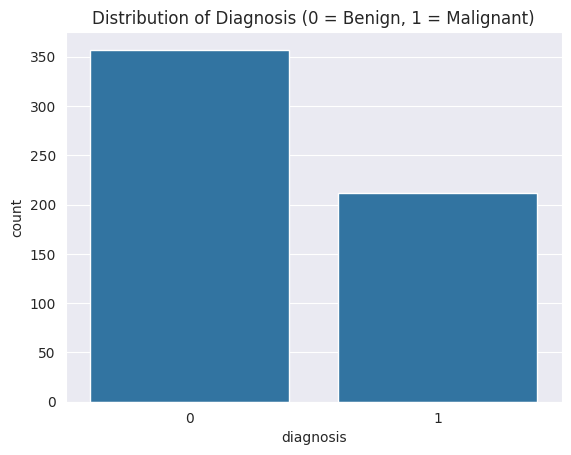

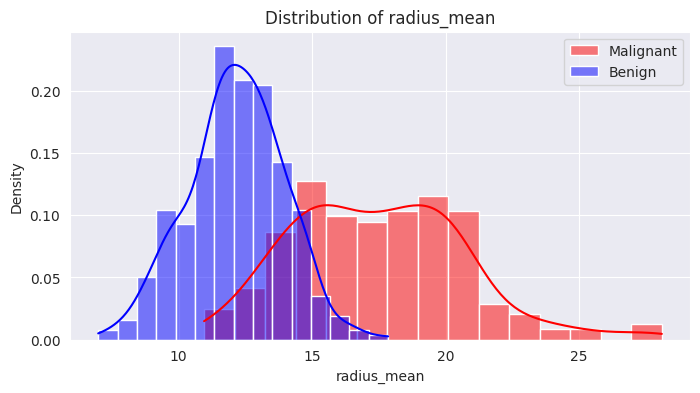

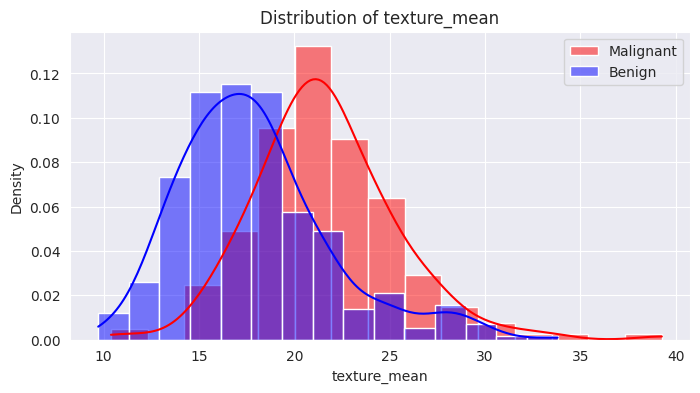

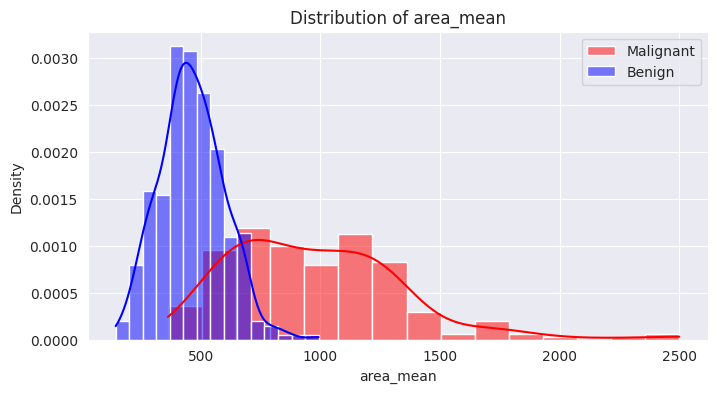

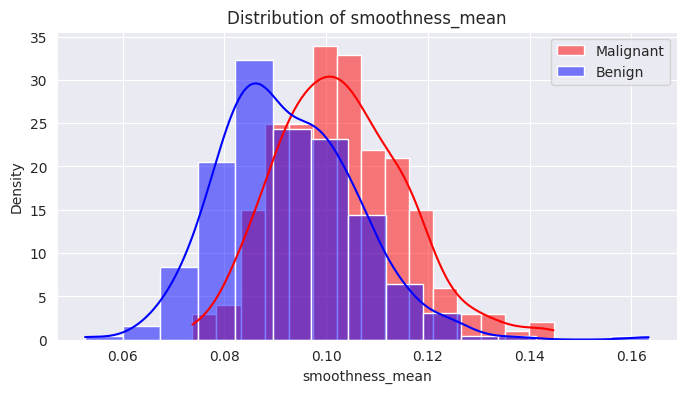

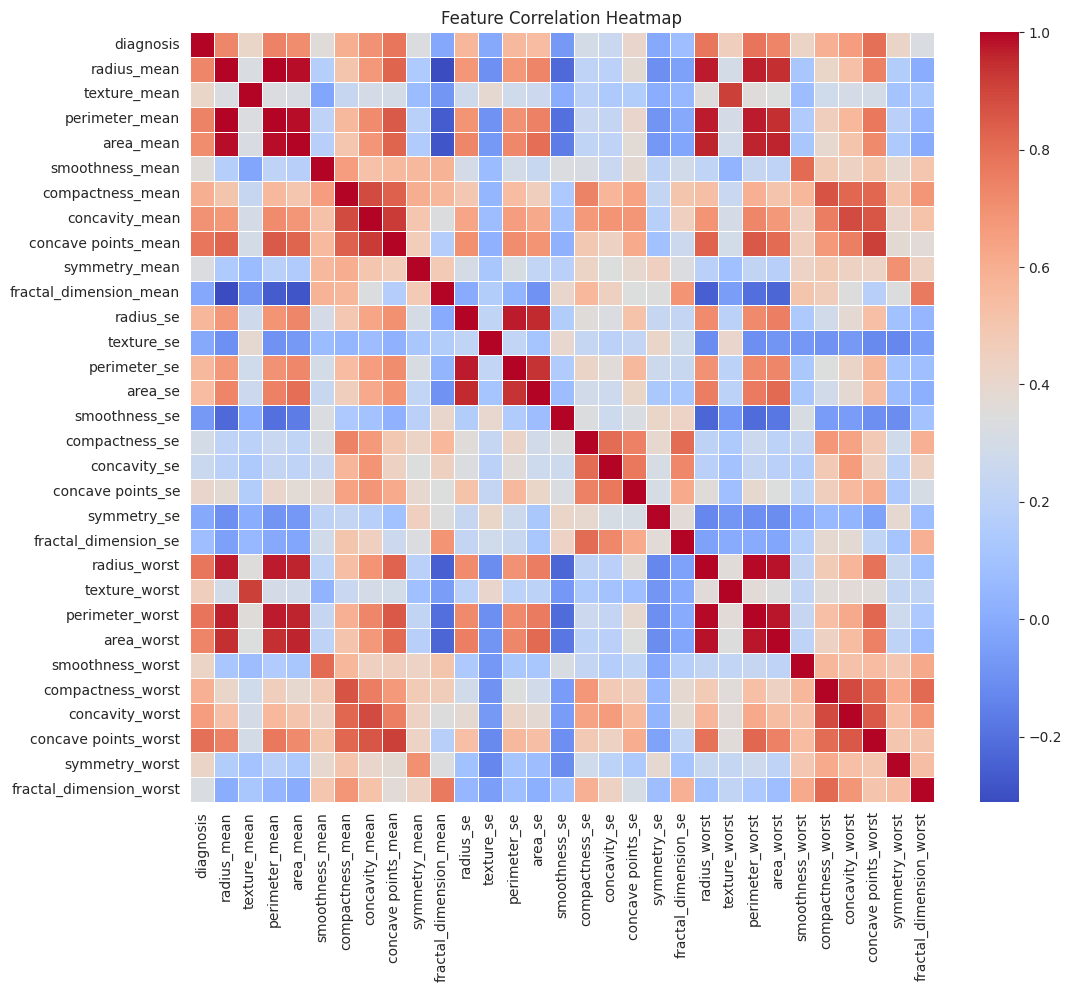

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Distribution of Diagnosis (0 = Benign, 1 = Malignant)")
plt.show()

selected_features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean']
df_malignant = df[df['diagnosis'] == 1]
df_benign = df[df['diagnosis'] == 0]

for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_malignant[feature], color='red', label='Malignant', kde=True, stat="density", bins=15)
    sns.histplot(df_benign[feature], color='blue', label='Benign', kde=True, stat="density", bins=15)
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


### **6. Data Splitting**

#### **Objective**
To ensure unbiased evaluation of model performance, the dataset is divided into training and testing sets. The training set is used to build and optimize the models, while the testing set is used to evaluate how well the models generalize to unseen data.

---

#### **Steps for Data Splitting**
1. **Split Proportion**:
   - The dataset is split into **80% training** and **20% testing** subsets.
   - A stratified split is used to maintain the class distribution in both training and testing sets.

2. **Random State**:
   - A fixed `random_state` ensures reproducibility of the split.

---

#### **Code Implementation**


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 455
Testing set size: 114


### **7. Model Training and Evaluation (Pre-Tuning)**

#### **Objective**
Train multiple machine learning models using the training dataset and evaluate their performance on the testing dataset. This step provides baseline metrics for each model before hyperparameter tuning.

---

#### **Models Trained**
1. **Logistic Regression**
2. **Random Forest**
3. **K-Nearest Neighbors (KNN)**
4. **Support Vector Machine (SVM)**

---

#### **Evaluation Metrics**
The following metrics will be used to assess model performance:
- **Accuracy**: Proportion of correctly classified samples.
- **AUC (Area Under the Curve)**: Measures the ability of the model to distinguish between classes.
- **Confusion Matrix**: Visual representation of classification performance.

---

#### **Code Implementation**


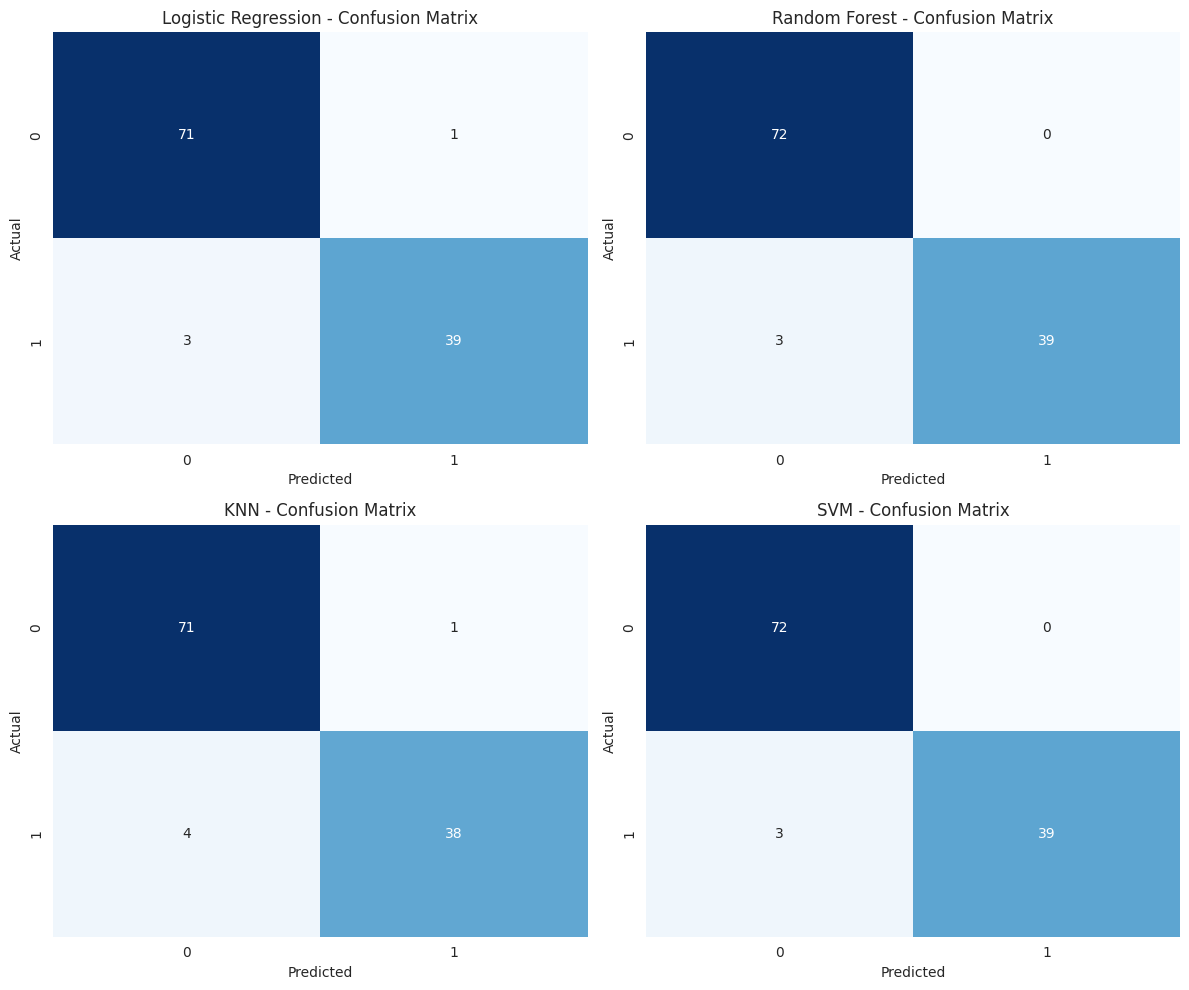

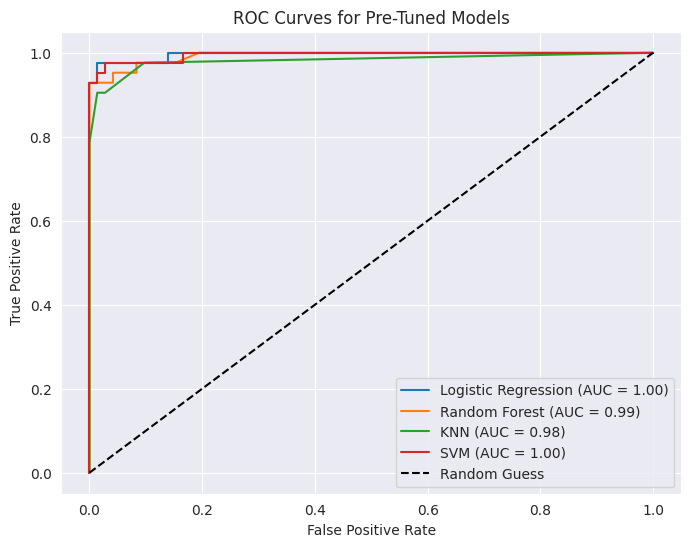

--- Logistic Regression ---
Accuracy: 0.96
AUC: 1.00

--- Random Forest ---
Accuracy: 0.97
AUC: 0.99

--- KNN ---
Accuracy: 0.96
AUC: 0.98

--- SVM ---
Accuracy: 0.97
AUC: 1.00


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42)
}

results = {}
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create subplots for confusion matrices

for ax, (name, model) in zip(axes.flatten(), models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if name != "SVM" else model.decision_function(X_test)
    
    accuracy = model.score(X_test, y_test)
    auc_score = roc_auc_score(y_test, y_prob)
    results[name] = {"Accuracy": accuracy, "AUC": auc_score}
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"{name} - Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1] if name != "SVM" else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Pre-Tuned Models")
plt.legend()
plt.show()

for name, metrics in results.items():
    print(f"--- {name} ---")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"AUC: {metrics['AUC']:.2f}")
    print()


### **8. Hyperparameter Tuning**

#### **Objective**
The goal of this step is to improve model performance by finding the optimal hyperparameters for each model. This ensures better accuracy, AUC, and overall reliability.

---

#### **Process**
1. **Technique Used**:
   - **GridSearchCV** with 5-fold cross-validation was employed to search for the best combination of hyperparameters.

2. **Models Tuned**:
   - **Logistic Regression**:
     - Parameters tuned: `C` (regularization strength) and `solver`.
   - **Random Forest**:
     - Parameters tuned: `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.
   - **Support Vector Machine (SVM)**:
     - Parameters tuned: `C` (regularization), `kernel`, and `gamma`.

3. **Evaluation Metric**:
   - **AUC (Area Under the Curve)** was used to determine the best hyperparameters.


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"],
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "SVM": {
        "C": [0.01, 0.1, 1, 10, 100],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"],
    }
}


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
}

best_params = {}
best_scores = {}

for name, model in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], scoring="roc_auc", cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_params[name] = grid_search.best_params_
    best_scores[name] = grid_search.best_score_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best AUC Score for {name}: {grid_search.best_score_}")
    print()


Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best AUC Score for Logistic Regression: 0.9959752321981424

Tuning Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best AUC Score for Random Forest: 0.9905572755417957

Tuning SVM...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best AUC Score for SVM: 0.9947368421052631


### **8. Evaluation of Tuned Models**

#### **Objective**
The goal of this step is to evaluate the performance of the models with their optimal hyperparameters. We will compare the tuned models’ performance against their pre-tuning results using metrics such as **Accuracy** and **AUC**, as well as visualization tools like **Confusion Matrices** and **ROC Curves**.

---

#### **Performance Metrics**
1. **Accuracy**: Measures the proportion of correctly classified samples.
2. **AUC (Area Under the Curve)**: Indicates the model's ability to distinguish between classes.
3. **Confusion Matrices**: Provide a detailed view of the classification results, highlighting true positives, true negatives, false positives, and false negatives.
4. **ROC Curves**: Visualize the trade-off between true positive and false positive rates for each model.


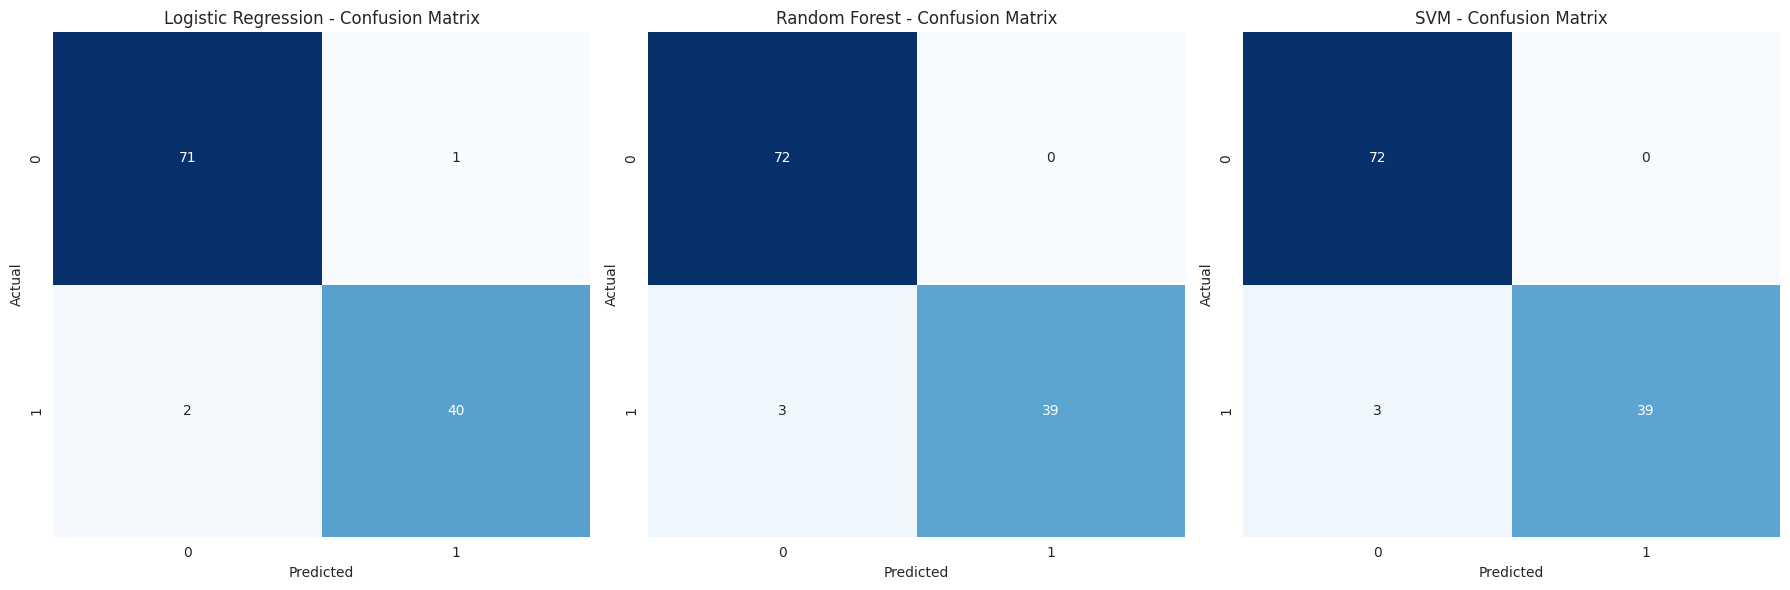

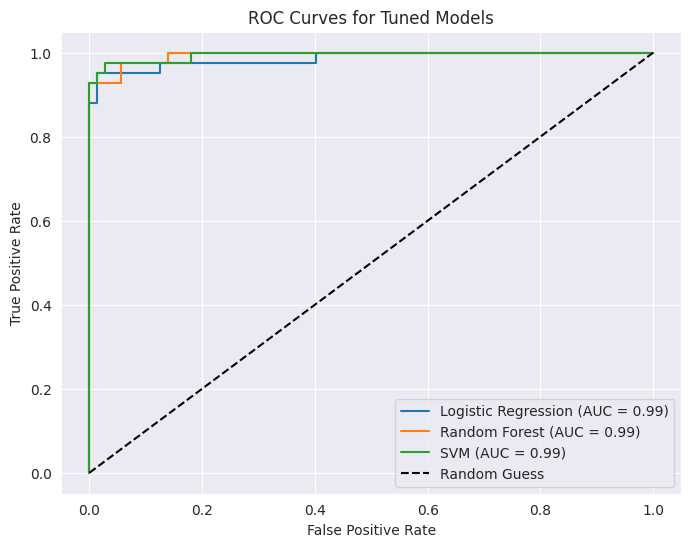

--- Logistic Regression ---
Accuracy: 0.97
AUC: 0.99

--- Random Forest ---
Accuracy: 0.97
AUC: 0.99

--- SVM ---
Accuracy: 0.97
AUC: 0.99


In [13]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

tuned_results = {}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

for ax, (name, params) in zip(axes.flatten(), best_params.items()):
    if name == "Logistic Regression":
        model = LogisticRegression(**params, max_iter=1000, random_state=42)
    elif name == "Random Forest":
        model = RandomForestClassifier(**params, random_state=42)
    elif name == "SVM":
        model = SVC(**params, probability=True, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if name != "SVM" else model.decision_function(X_test)

    accuracy = model.score(X_test, y_test)
    auc_score = roc_auc_score(y_test, y_prob)
    tuned_results[name] = {"Accuracy": accuracy, "AUC": auc_score}

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"{name} - Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
for name, params in best_params.items():
    if name == "Logistic Regression":
        model = LogisticRegression(**params, max_iter=1000, random_state=42)
    elif name == "Random Forest":
        model = RandomForestClassifier(**params, random_state=42)
    elif name == "SVM":
        model = SVC(**params, probability=True, random_state=42)

    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1] if name != "SVM" else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Tuned Models")
plt.legend()
plt.show()

for model, metrics in tuned_results.items():
    print(f"--- {model} ---")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"AUC: {metrics['AUC']:.2f}")
    print()


# 9. Discussion and Conclusion

## 9.1 Key Findings and Model Performance
- All models achieved excellent performance with 97% accuracy and 0.99 AUC scores
- SVM and Random Forest performed marginally better than other models
- Feature analysis showed radius, texture, and area were strong predictors
- Hyperparameter tuning provided slight improvements over baseline models

## 9.2 Limitations
- Dataset limited to 569 samples from single source
- No external validation dataset
- Features derived from image processing, not raw images

## 9.3 Future Improvements
- Validate on external datasets
- Implement feature selection techniques
- Add model interpretability analysis
- Develop real-time prediction capabilities

## 9.4 Clinical Impact
The high performance (97% accuracy, 0.99 AUC) demonstrates machine learning's potential as a reliable support tool for breast cancer diagnosis. While promising, these models should complement, not replace, clinical judgment. Future work should focus on external validation and clinical integration testing.